In [1]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_formats = ['svg']

def cum_var(input):
    return np.array([np.var(input[:i+1]) for i in np.arange(0, len(input))])

In [2]:
#d = pd.read_csv("../std_5000-std_4925.csv", header=None, names=["base", "candidate"])
d = pd.read_csv("../stable-unstable.csv", header=None, names=["base", "candidate"])

In [3]:
fig = plt.figure()
ax = fig.add_subplot()

x = [np.min(d), np.max(d)]
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(x, x, color='red', linewidth=0.3)
ax.scatter(d['base'], d['candidate'], s=2)

fig.show()

4.674165467008415


/tmp/ipykernel_132/209930140.py:14: RuntimeWarning: divide by zero encountered in divide
  ratio = np.roll(forward_var, -1) / forward_var


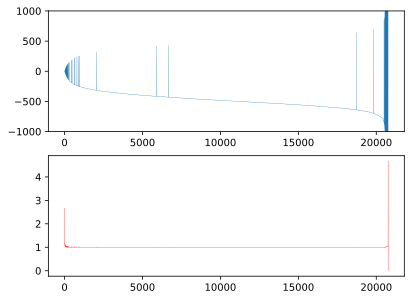

In [6]:
diff = d['candidate'] - d['base']
diff = diff[np.abs(diff).argsort()]

fig = plt.figure()
ax = fig.subplots(2, 1)

x = np.arange(0, len(diff))
#ax.set_yscale('log')
#ax.set_xscale('log')
ax[0].set_ylim(-1000, 1000)
ax[0].plot(x, diff, linewidth=0.3)

forward_var = cum_var(diff)
ratio = np.roll(forward_var, -1) / forward_var
#ax[1].set_ylim(0.9, 1.5)
ax[1].plot(x, ratio, linewidth=0.3, color='red')

print(np.max(ratio[-100:]))

fig.show()

In [103]:
cum_var(diff)

array([      0.        ,       0.        ,       0.        , ...,
       1548075.07555562, 1945604.29196507, 2406905.48509233])